In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("steps_tracker_dataset.csv")

print("Total rows and columns:", df.shape)
print("\n Columns: \n",df.columns)
print("\nDuplicate rows:", df.duplicated().sum())
print("Missing values per column:\n", df.isnull().sum())


Total rows and columns: (525, 8)

 Columns: 
 Index(['date', 'steps', 'distance_km', 'calories_burned', 'active_minutes',
       'sleep_hours', 'water_intake_liters', 'mood'],
      dtype='object')

Duplicate rows: 0
Missing values per column:
 date                    0
steps                  78
distance_km            12
calories_burned        15
active_minutes          9
sleep_hours            76
water_intake_liters    79
mood                    0
dtype: int64


In [2]:
numerical_cols = ['steps', 'distance_km', 'calories_burned', 'active_minutes', 'sleep_hours', 'water_intake_liters']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in numerical_cols:
    if abs(df[col].skew()) < 1:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_13208\2251478263.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [3]:
date = df['date']
df.drop('date', axis=1, inplace=True)
duplicate_rows_before = len(df[df.duplicated()])
missing_values_before = df.isnull().sum().sum()
df.drop_duplicates(inplace=True)
duplicate_rows_after = len(df[df.duplicated()])

missing_values_after = df.isnull().sum().sum()


print("Missing values after cleaning:")
print(df.isnull().sum())
print("\nNumber of duplicate rows after cleaning:", duplicate_rows_after)
print("\nTotal number of rows after cleaning:", len(df))

Missing values after cleaning:
steps                  0
distance_km            0
calories_burned        0
active_minutes         0
sleep_hours            0
water_intake_liters    0
mood                   0
dtype: int64

Number of duplicate rows after cleaning: 0

Total number of rows after cleaning: 525


In [4]:
print(df.describe())

              steps  distance_km  calories_burned  active_minutes  \
count    525.000000   525.000000       525.000000      525.000000   
mean    8431.243848     6.278947       332.792314       88.031008   
std     3381.637264     3.083093       153.248261       43.273617   
min     2065.000000     0.080000        -3.830000        0.000000   
25%     5921.000000     3.970000       208.950000       56.000000   
50%     8431.243848     6.070000       332.792314       87.000000   
75%    10884.000000     8.510000       448.900000      118.000000   
max    14941.000000    14.980000       658.770000      200.000000   

       sleep_hours  water_intake_liters  
count   525.000000           525.000000  
mean      7.108909             2.464933  
std       1.425185             0.703365  
min       2.500000             0.500000  
25%       6.300000             2.060000  
50%       7.108909             2.464933  
75%       8.000000             2.830000  
max      11.600000             4.920000  


In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_zscore = df[num_cols].apply(zscore)
print("\nZ-Score standardized (first 5 rows):")
print(df_zscore.head())

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
print("\nMin-Max normalized (first 5 rows):")
print(df_norm.head())



Z-Score standardized (first 5 rows):
      steps  distance_km  calories_burned  active_minutes   sleep_hours  \
0  1.071732     0.662646         0.758367        1.178954  6.237964e-16   
1  0.000000    -1.960598        -2.110370       -1.966836  6.960755e-01   
2 -0.325669    -0.642483        -0.360493        0.230591 -2.871898e-01   
3 -1.501960    -0.567811        -1.650481       -1.874313  6.237964e-16   
4 -0.489947    -0.454181        -0.513724       -0.625249  1.398408e+00   

   water_intake_liters  
0             0.135290  
1             1.031838  
2            -1.700501  
3            -0.903569  
4            -0.234715  

Min-Max normalized (first 5 rows):
      steps  distance_km  calories_burned  active_minutes  sleep_hours  \
0  0.775629     0.553020         0.683263           0.695     0.506473   
1  0.494427     0.010738         0.020404           0.015     0.615385   
2  0.408978     0.283221         0.424736           0.490     0.461538   
3  0.100342     0.298658     

In [6]:
print("Variance:\n",df[num_cols].var())
print("\nStandard Deviation:\n",df[num_cols].std())

Variance:
 steps                  1.143547e+07
distance_km            9.505465e+00
calories_burned        2.348503e+04
active_minutes         1.872606e+03
sleep_hours            2.031153e+00
water_intake_liters    4.947220e-01
dtype: float64

Standard Deviation:
 steps                  3381.637264
distance_km               3.083093
calories_burned         153.248261
active_minutes           43.273617
sleep_hours               1.425185
water_intake_liters       0.703365
dtype: float64


In [7]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    mask = (df[col] < lower) | (df[col] > upper)
    count = mask.sum()
    outlier_summary[col] = count

    print(f"{col}: {count} outlier{'s' if count!=1 else ''} (values < {lower:.2f} or > {upper:.2f})")




steps: 0 outliers (values < -1523.50 or > 18328.50)
distance_km: 0 outliers (values < -2.84 or > 15.32)
calories_burned: 0 outliers (values < -150.97 or > 808.82)
active_minutes: 0 outliers (values < -37.00 or > 211.00)
sleep_hours: 12 outliers (values < 3.75 or > 10.55)
water_intake_liters: 21 outliers (values < 0.91 or > 3.99)


In [8]:
# Remove outliers according to IQR for all numeric columns
df_no_outliers = df.copy()

for col in num_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)
    ]

print("Original DataFrame shape:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)
df = df_no_outliers.copy()



Original DataFrame shape: (525, 7)
Shape after outlier removal: (493, 7)


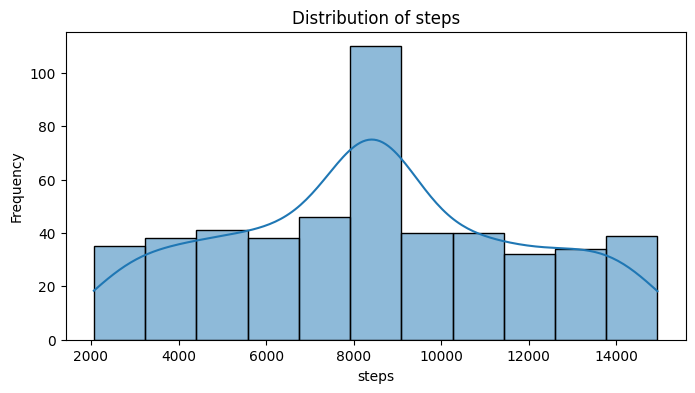

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df_no_nulls = df.dropna()
plt.figure(figsize=(8, 4))
sns.histplot(df_no_nulls['steps'], kde=True)
plt.title('Distribution of steps')
plt.xlabel('steps')
plt.ylabel("Frequency")
plt.show()


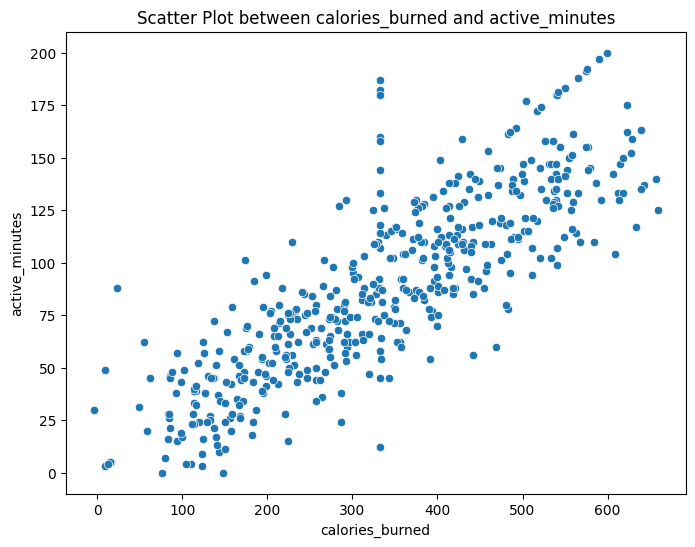

In [10]:
df_no_nulls = df.dropna()
col1, col2 = df_no_nulls.select_dtypes(include=['float64', 'int64']).columns[2:4]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_nulls, x=col1, y=col2)
plt.title(f'Scatter Plot between {col1} and {col2}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()


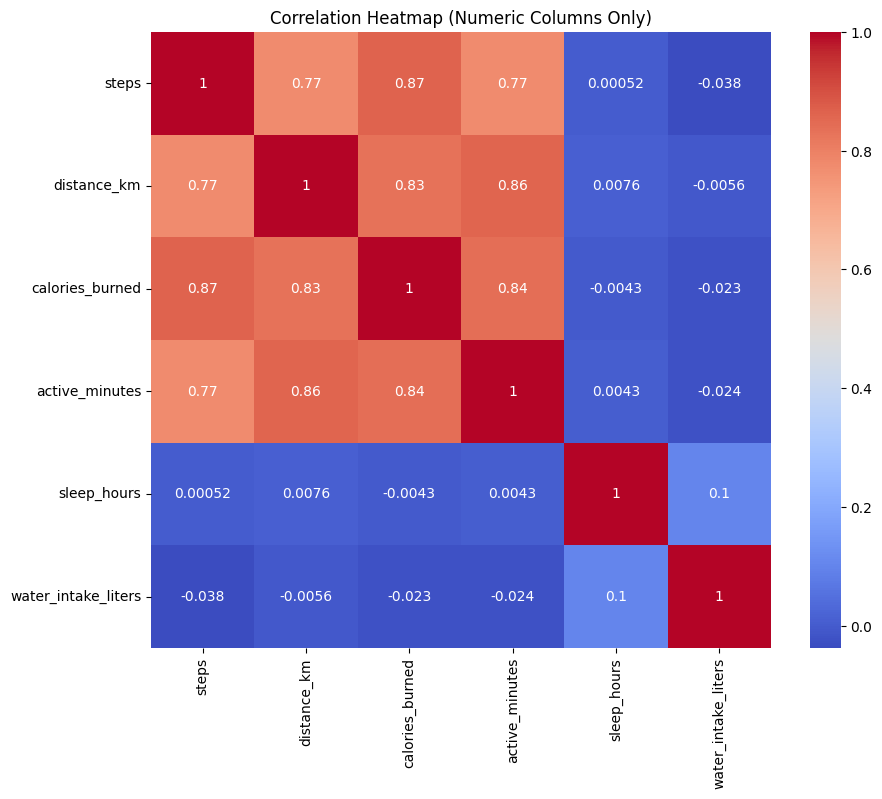

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


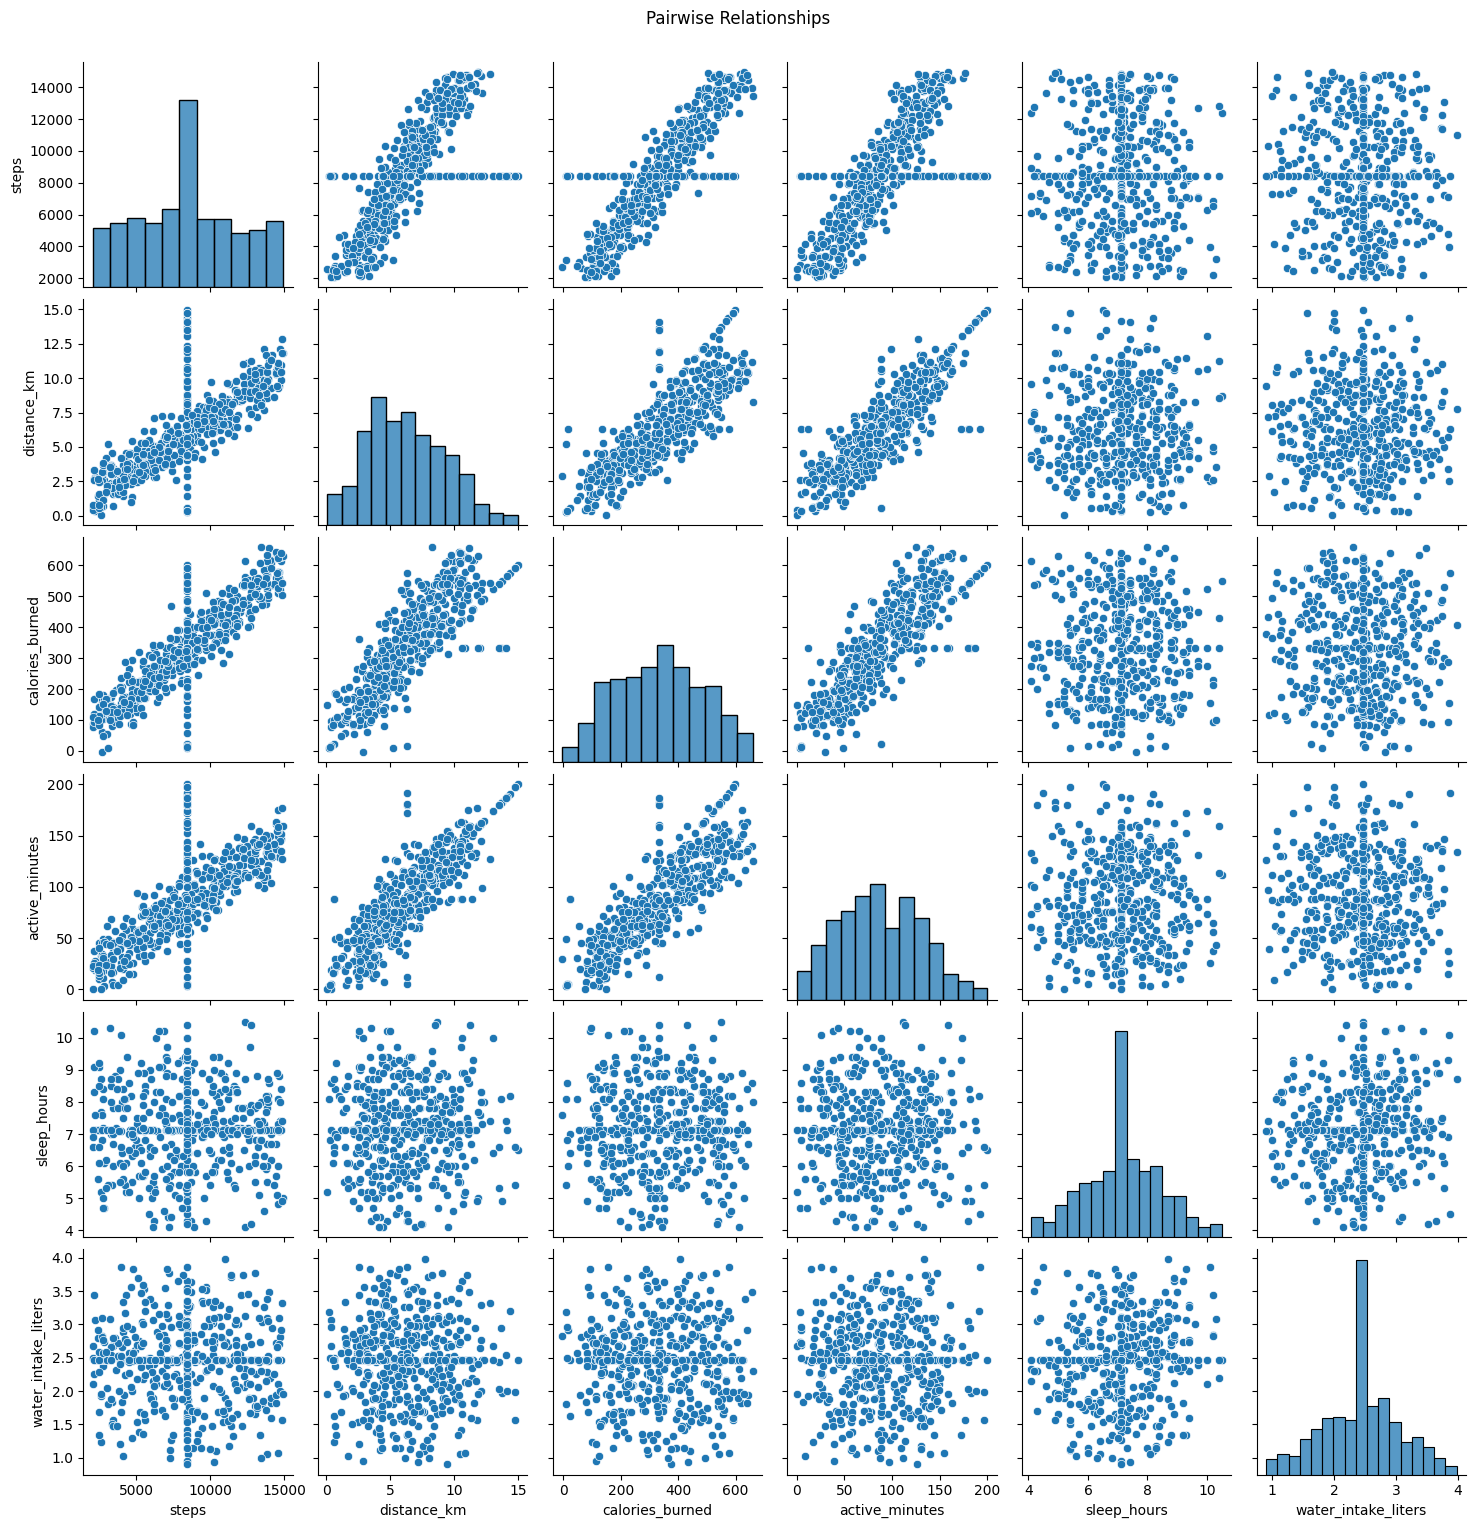

In [12]:
# Pair plot of numeric features
sns.pairplot(df[num_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


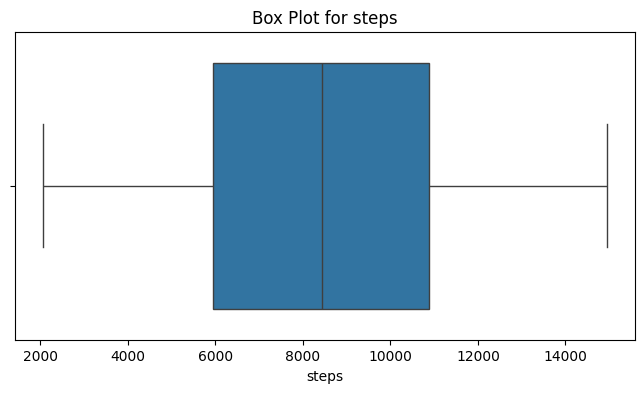

In [13]:


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['steps'])
plt.title('Box Plot for steps')
plt.xlabel('steps')
plt.show()


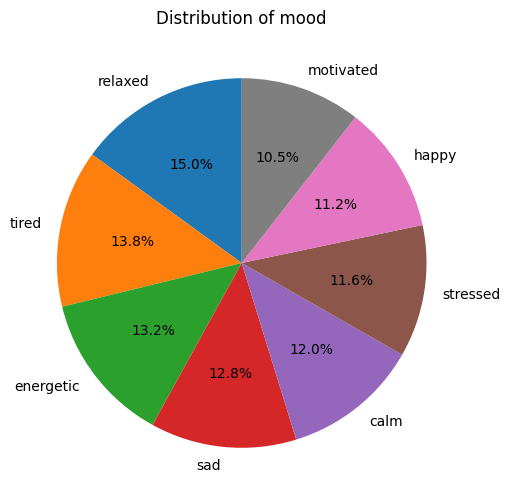

In [14]:

cat_col = 'mood'

df[cat_col].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    ylabel=''
)
plt.title(f'Distribution of {cat_col}')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13208\1360313128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mood', y='steps', data=df, estimator='mean', palette='pastel')


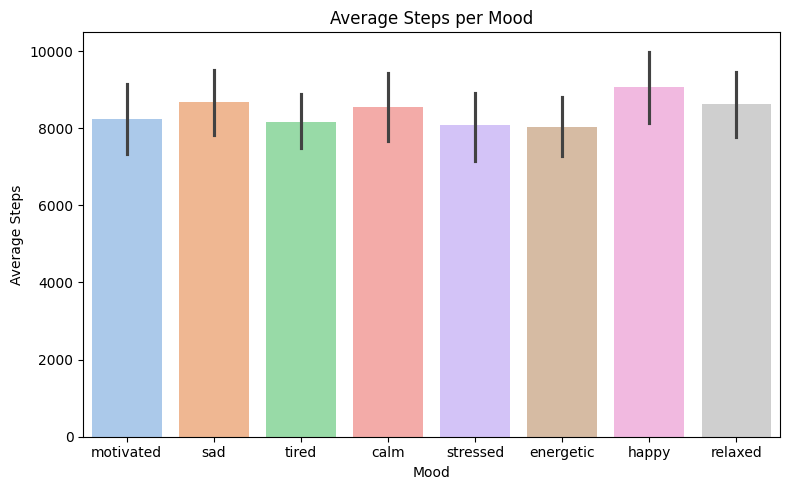

In [15]:

plt.figure(figsize=(8, 5))
sns.barplot(x='mood', y='steps', data=df, estimator='mean', palette='pastel')
plt.title('Average Steps per Mood')
plt.xlabel('Mood')
plt.ylabel('Average Steps')
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13208\1427862268.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(date)


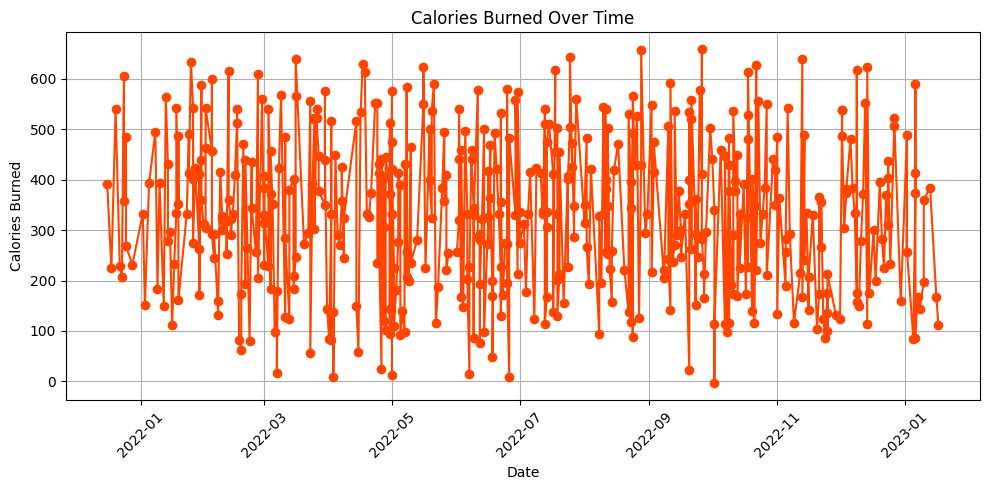

In [16]:

df['date'] = pd.to_datetime(date)

# Sort the DataFrame by date
df_sorted = df.sort_values('date')

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['date'], df_sorted['calories_burned'], marker='o', linestyle='-', color='orangered')
plt.title('Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df.to_csv("steps_tracker_dataset_cleaned.csv", index=False)


In [18]:
X = df[['steps', 'distance_km', 'calories_burned', 'active_minutes', 'sleep_hours', 'water_intake_liters']]
y = df['mood']


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
pred = model.predict(X_test)


In [22]:
le.inverse_transform(pred)


array(['energetic', 'motivated', 'motivated', 'energetic', 'happy',
       'motivated', 'sad', 'motivated', 'stressed', 'relaxed', 'happy',
       'happy', 'happy', 'energetic', 'calm', 'sad', 'stressed',
       'energetic', 'stressed', 'energetic', 'stressed', 'stressed',
       'tired', 'relaxed', 'relaxed', 'sad', 'happy', 'calm', 'calm',
       'sad', 'sad', 'stressed', 'energetic', 'tired', 'tired', 'calm',
       'sad', 'relaxed', 'calm', 'motivated', 'happy', 'motivated',
       'motivated', 'tired', 'tired', 'happy', 'happy', 'energetic',
       'happy', 'energetic', 'calm', 'calm', 'calm', 'sad', 'calm',
       'relaxed', 'motivated', 'happy', 'stressed', 'sad', 'tired',
       'calm', 'relaxed', 'relaxed', 'motivated', 'tired', 'stressed',
       'motivated', 'motivated', 'happy', 'motivated', 'stressed',
       'energetic', 'relaxed', 'calm', 'calm', 'sad', 'sad', 'relaxed',
       'energetic', 'stressed', 'sad', 'tired', 'stressed', 'energetic',
       'motivated', 'stresse